In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00044.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00671.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00482.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00103.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00621.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00994.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00112.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00801.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00053.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00610.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00259.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00760.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00361.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00790.jpeg
/kaggle/input/digits/digits_jpeg/digits_jpeg/7/img008-00009.jpeg
/kaggle/input/digits/digi

In [173]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 

In [174]:
data = os.listdir(r"../input/digits/digits updated/digits updated" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"../input/digits/digits updated/digits updated" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"../input/digits/digits updated/digits updated" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


In [179]:
#Spliting the train validation and test sets

train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [180]:
# Preprocessing the images for neuralnet
def Prep(img):
    print(f"Original image shape: {img.shape}")  # Print the original image shape
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(f"Shape after converting to grayscale: {img.shape}")  # Print shape after conversion
    elif len(img.shape) == 2:
        print("Image is already grayscale, skipping conversion.")
    else:
        print(f"Warning: Image shape {img.shape} cannot be processed")
        return None

    img = cv2.equalizeHist(img)
    img = img / 255
    return img


train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape after converting to grayscale: (32, 32)
Original image shape: (32, 32, 3)
Shape 

In [181]:
#Creating a Neural Network

model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 60)        1560      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 60)        90060     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 60)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 30)        16230     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 30)        8130      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 30)          0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 8, 8, 30)        

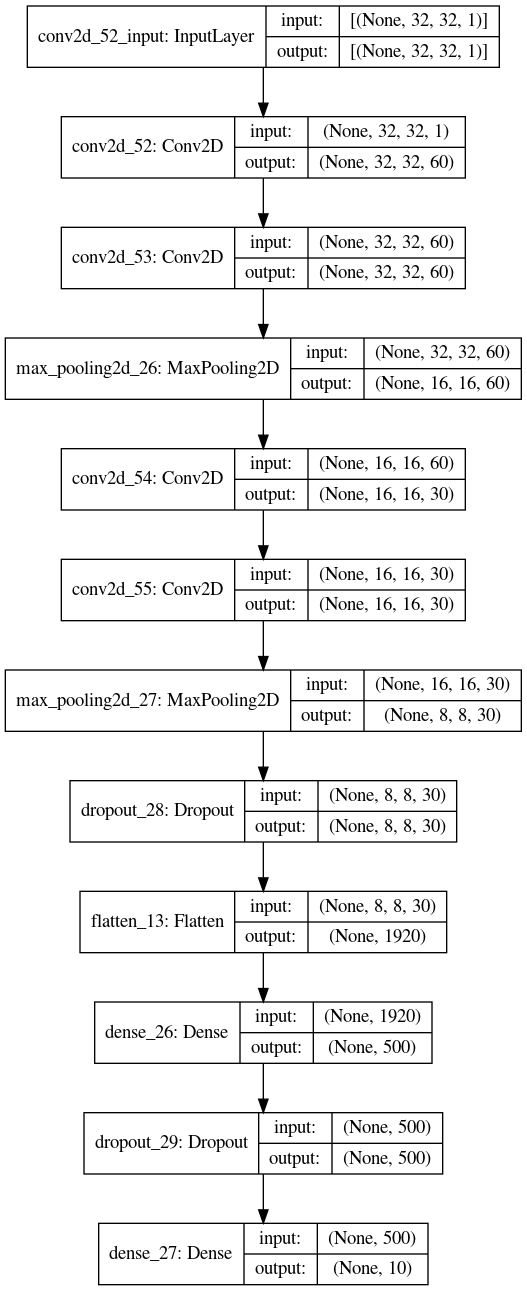

In [182]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [183]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [184]:
#Compiling the model

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

Epoch 1/30
200/200 - 3s - loss: 1.0064 - accuracy: 0.6547 - val_loss: 0.1092 - val_accuracy: 0.9679
Epoch 2/30
200/200 - 2s - loss: 0.2733 - accuracy: 0.9105 - val_loss: 0.0697 - val_accuracy: 0.9798
Epoch 3/30
200/200 - 2s - loss: 0.1848 - accuracy: 0.9450 - val_loss: 0.0399 - val_accuracy: 0.9881
Epoch 4/30
200/200 - 2s - loss: 0.1630 - accuracy: 0.9512 - val_loss: 0.0445 - val_accuracy: 0.9845
Epoch 5/30
200/200 - 2s - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 6/30
200/200 - 2s - loss: 0.1363 - accuracy: 0.9577 - val_loss: 0.0301 - val_accuracy: 0.9912
Epoch 7/30
200/200 - 2s - loss: 0.1161 - accuracy: 0.9658 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 8/30
200/200 - 2s - loss: 0.1077 - accuracy: 0.9675 - val_loss: 0.0445 - val_accuracy: 0.9881
Epoch 9/30
200/200 - 2s - loss: 0.0985 - accuracy: 0.9716 - val_loss: 0.0596 - val_accuracy: 0.9850
Epoch 10/30
200/200 - 2s - loss: 0.1088 - accuracy: 0.9688 - val_loss: 0.0239 - val_accuracy: 0.9922

In [185]:
# Testing the model on the test set

score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.05105632543563843
Test Accuracy = 0.9901574850082397


_100_5064037.jpeg


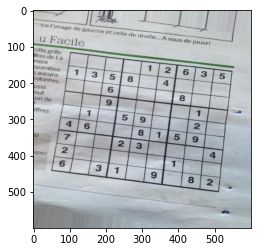

In [187]:
# Randomly select an image from the dataset 

folder=r"../input/sudoku-box-detection/aug"

a=random.choice(os.listdir(folder))
print(a)
sudoku_a = cv2.imread(folder+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show() 

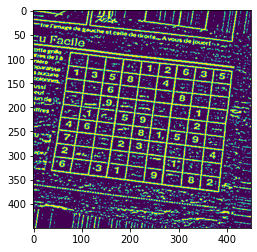

In [188]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

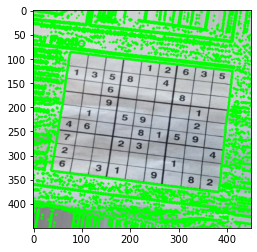

In [189]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

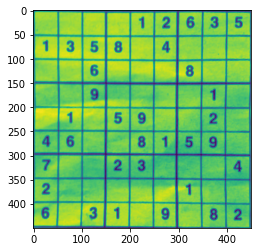

In [190]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

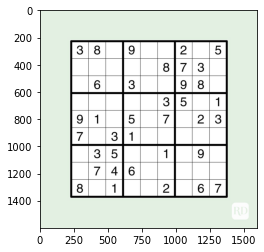

In [191]:
# Importing puzzle to be solved
puzzle = cv2.imread("../input/su-puzzle/su.jpg")

#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

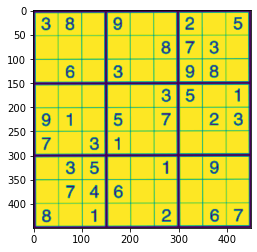

In [192]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

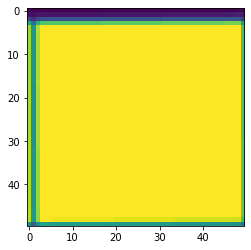

In [193]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()

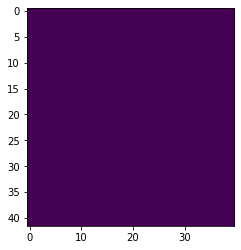

In [194]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()

In [196]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        classIndex = model.predict_classes(img)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

In [197]:
# Reshaping the grid to a 9x9 matrix

grid = np.reshape(grid,(9,9))
grid

array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]])

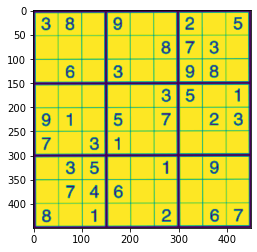

In [198]:
#For compairing 
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

In [199]:
#This function finds the next box to solve 

def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

#Function to fill in the possible values by evaluating rows collumns and smaller cells

def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n and row != i:
            return False
    for i in range (0,9):
        if quiz[i][col] == n and col != i:
            return False
        
    row0 = (row)//3
    col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n and (i,j) != (row, col):
                return False
    return True

#Recursion function to loop over untill a valid answer is found. 

def solve(quiz):
    val = next_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
                quiz[row][col]=n
                if solve(quiz):
                    return True 
                else:
                    quiz[row][col]=0
        return 
    
def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")

In [200]:
solve(grid)

True

In [201]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist. Model misread digits.")

3 8 7 | 9 4 6 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
....................
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 6 7 | 6 2 3
7 5 3 | 1 2 4 | 8 4 9
....................
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7
